### Linear Regression real time example


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Exploring the descriptive statistics of the variables

In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [31]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
data_no_mv = data.dropna(axis=0)

In [14]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Finally, the count values are achieved similar i.e.., 4025 for all respective features


<Axes: xlabel='Price', ylabel='Count'>

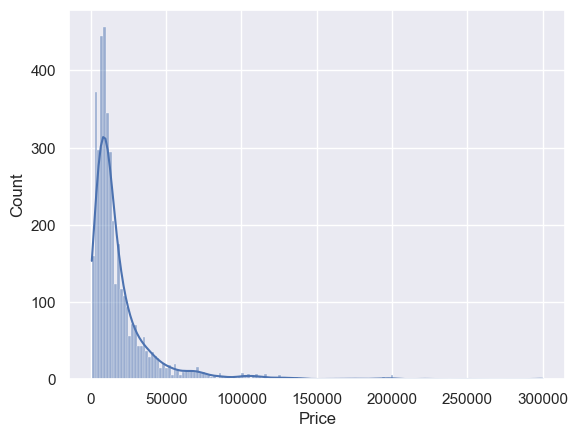

In [24]:
sns.histplot(data_no_mv['Price'],kde=True)

### For optimal result we will be looking for normal disribution, if we obsever the graph there are some outliers 


### outliers are the observations that lie ON abnormal distance from other observations in the data

In [103]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

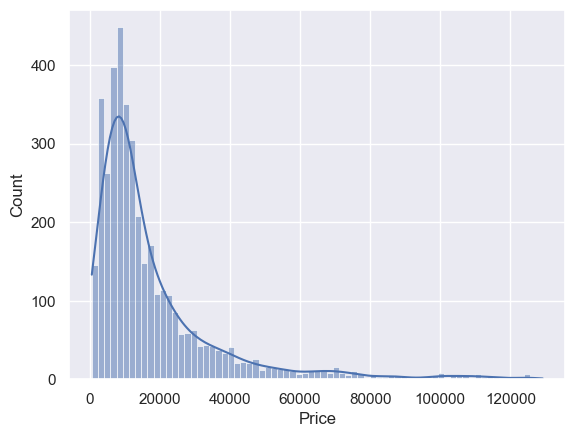

In [104]:
sns.histplot(data_1['Price'],kde=True)

<Axes: xlabel='Mileage', ylabel='Count'>

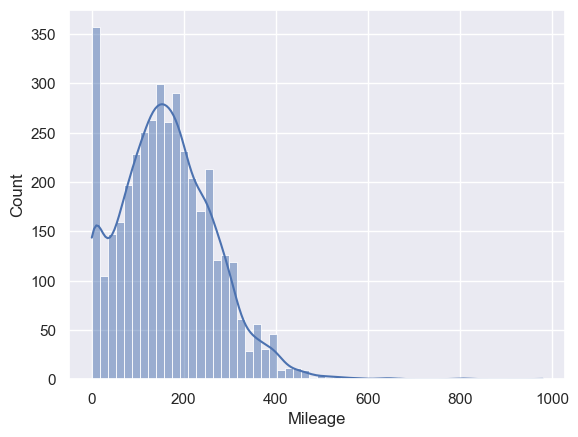

In [105]:
sns.histplot(data_no_mv['Mileage'],kde=True)

<Axes: xlabel='Mileage', ylabel='Count'>

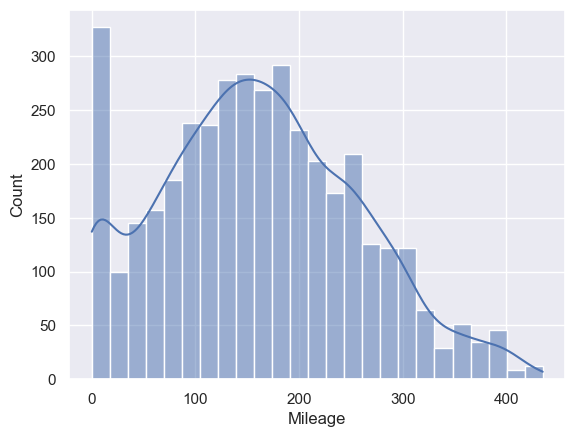

In [106]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'],kde=True)

<Axes: xlabel='EngineV', ylabel='Count'>

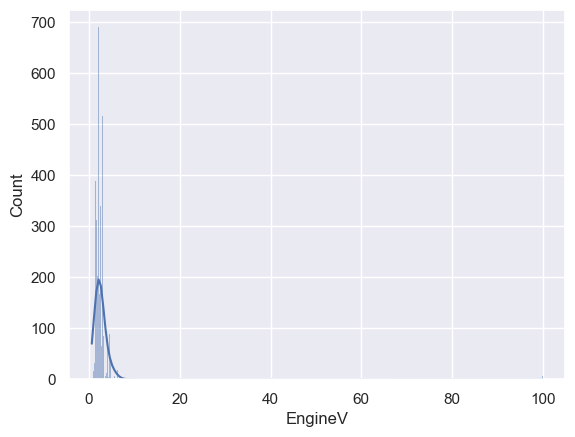

In [107]:
sns.histplot(data_no_mv['EngineV'],kde=True)

<Axes: xlabel='EngineV', ylabel='Count'>

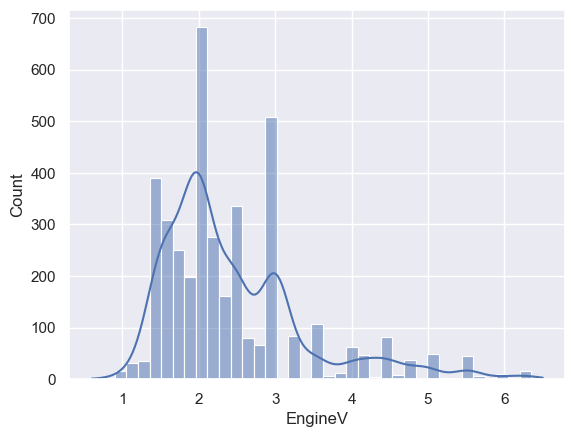

In [338]:
data_3 = data_2[data_2['EngineV']<7.1]
sns.histplot(data_3['EngineV'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

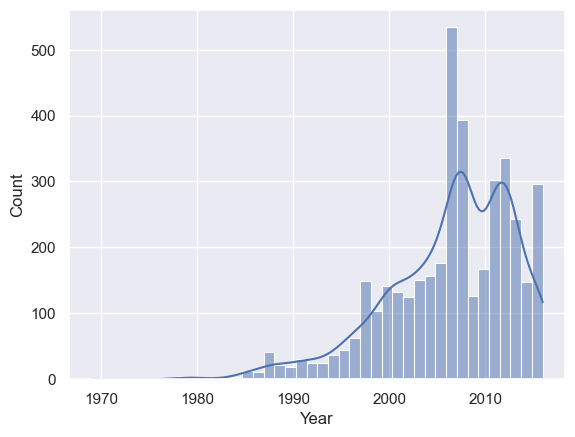

In [339]:
sns.histplot(data_no_mv['Year'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

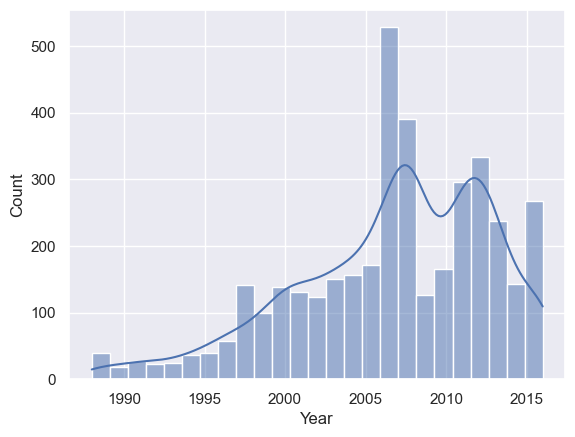

In [340]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.histplot(data_4['Year'],kde=True)

In [341]:
data_cleaned = data_4.reset_index(drop=True)

In [342]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.00,3868,3868.00,3868.00,3868,3868,3868.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.93,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.42,NaN,95.62,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


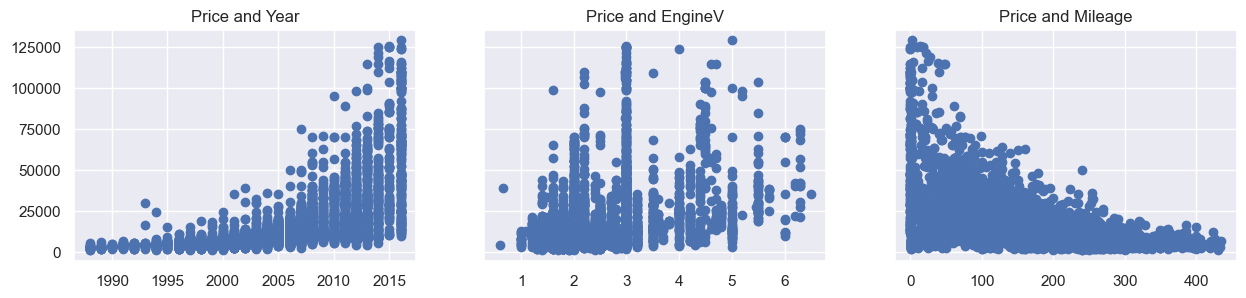

In [343]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

<Axes: xlabel='Price', ylabel='Count'>

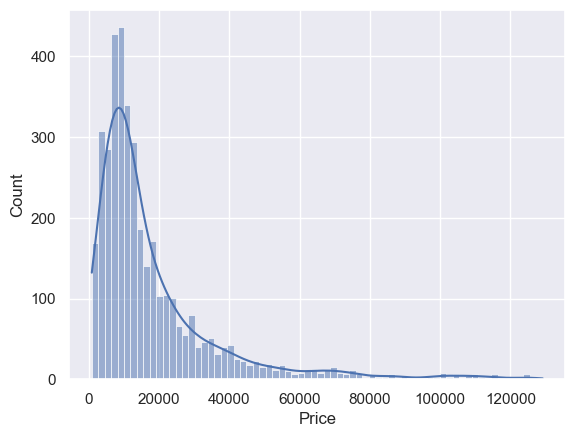

In [344]:
sns.histplot(data_cleaned['Price'],kde=True)

In [345]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3863,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3864,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3865,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3866,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


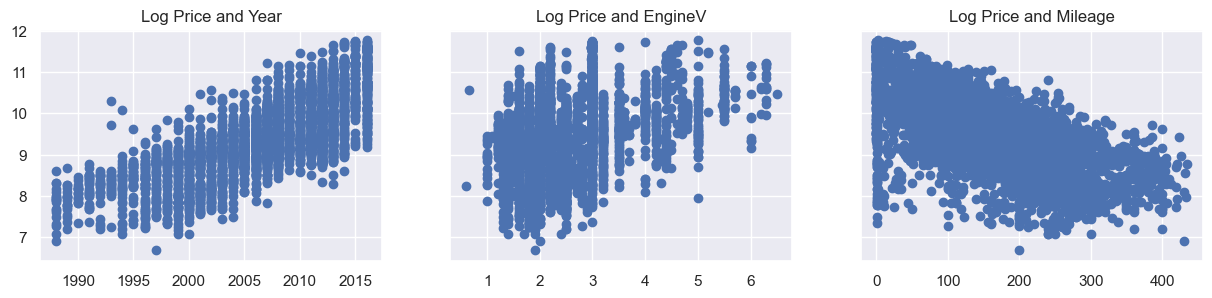

In [346]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [347]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [348]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [349]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [350]:
vif


,VIF,features
0,3.79,Mileage
1,10.33,Year
2,7.64,EngineV


In [351]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [352]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [353]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.90,8.97,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.00,9.50,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange a bit

In [354]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [355]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [356]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

In [357]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [358]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [359]:
scaler.fit(inputs)

StandardScaler()

In [360]:
inputs_scaled = scaler.transform(inputs)

In [361]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [362]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [363]:
y_hat = reg.predict(x_train)

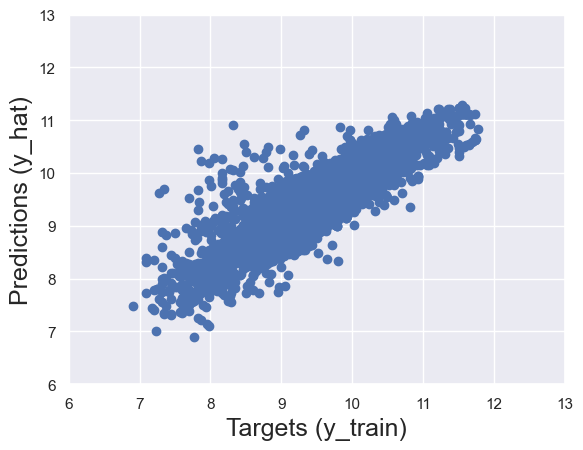

In [364]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

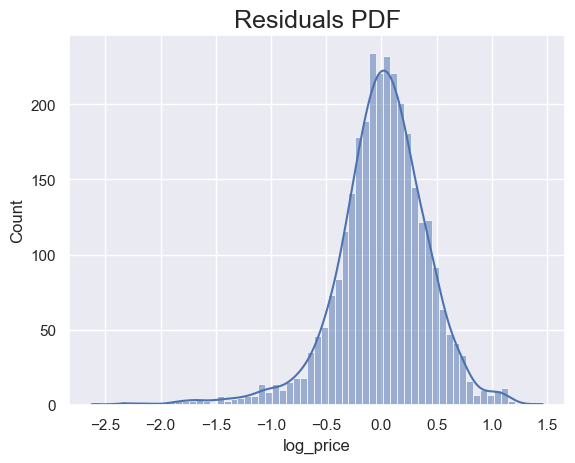

In [365]:
sns.histplot(y_train - y_hat,kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

In [366]:
reg.score(x_train,y_train)

0.7583866949948946

In [367]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.42000975196255

In [368]:
reg.coef_

array([-0.45831235,  0.21216834,  0.01266665,  0.01260123, -0.14001857,
       -0.18336064, -0.06485382, -0.09380217, -0.14413603, -0.09901954,
       -0.19434177, -0.12129436, -0.16354206, -0.12097883, -0.0312541 ,
       -0.15098459,  0.31987238])

In [369]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.14
9,Body_other,-0.10


In [370]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [371]:
y_hat_test = reg.predict(x_test)

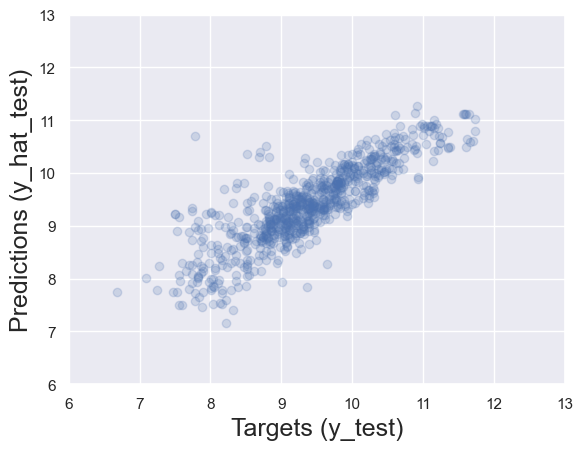

In [372]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [373]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10697.79
1,24093.44
2,7535.14
3,37079.23
4,11388.00


In [374]:
df_pf['Target'] = np.exp(y_test)
df_pf


,Prediction,Target
0,10697.79,NaN
1,24093.44,7900.00
2,7535.14,NaN
3,37079.23,NaN
4,11388.00,NaN
5,60325.81,14200.00
6,21197.77,NaN
7,11475.66,NaN
8,23199.32,11950.00
9,12751.78,NaN


In [375]:
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.74
1   10.02
2    7.82
3   10.90
4    9.12
Name: log_price, dtype: float64

In [376]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10697.79,2300.00
1,24093.44,22500.00
2,7535.14,2500.00
3,37079.23,54000.00
4,11388.00,9150.00
5,60325.81,69999.00
6,21197.77,38888.00
7,11475.66,15700.00
8,23199.32,28713.75
9,12751.78,12000.00


In [377]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [378]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10697.79,2300.00,-8397.79,365.12
1,24093.44,22500.00,-1593.44,7.08
2,7535.14,2500.00,-5035.14,201.41
3,37079.23,54000.00,16920.77,31.33
4,11388.00,9150.00,-2238.00,24.46
5,60325.81,69999.00,9673.19,13.82
6,21197.77,38888.00,17690.23,45.49
7,11475.66,15700.00,4224.34,26.91
8,23199.32,28713.75,5514.43,19.20
9,12751.78,12000.00,-751.78,6.26


In [379]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15807.15,17593.98,1786.84,41.87
std,12475.28,18933.62,10817.30,87.04
min,1295.98,800.00,-42022.52,0.00
25%,7569.59,6900.00,-2232.07,12.14
50%,11770.00,11249.50,119.10,25.02
75%,19930.65,20500.00,3168.54,41.79
max,78769.30,124000.00,80944.66,1750.94


In [380]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
252,9899.92,9900.00,0.08,0.00
518,4200.86,4200.00,-0.86,0.02
308,8903.04,8900.00,-3.04,0.03
72,4002.74,4000.00,-2.74,0.07
512,32545.43,32500.00,-45.43,0.14
648,21259.36,21335.00,75.64,0.35
723,6074.86,6100.00,25.14,0.41
549,3734.11,3750.00,15.89,0.42
259,6169.63,6200.00,30.37,0.49
769,29676.63,29500.00,-176.63,0.60
